<a href="https://colab.research.google.com/github/jbinteam/010723305/blob/main/%E0%B9%87Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ข้อมูล library
["numpy.random.normal"](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)

In [128]:
import numpy as np #เรียกใช้งาน library numpy โดยหลังจากนี้จะเรียกใช้ด้วยการพิมพ์สั้นๆแค่ np
from PIL import Image #เรียกใช้งาน Image จาก library PIL
from matplotlib import pyplot as plt #เรียกใช้งาน pyplot จาก matplotlib โดยหลังจากนี้จะเรียกใช้ด้วยการพิมพ์สั้นๆแค่ plt


73.48290256717523


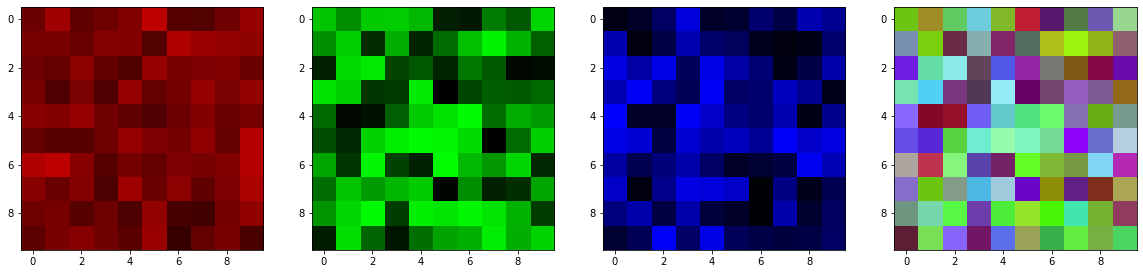

In [141]:
######## แก้ไข หรือ เพิ่มเติมโปรแกรมลงในโค๊ดด้านล่าง #######

mu, sigma = 125, 30 # mean and standard deviation
r = np.random.normal(mu, sigma, 100).astype(int)

g=np.random.randint(0, 255, 100)
g_mean=np.mean(g)
g_std_dev=np.std(g, ddof=1)

b=np.random.randint(0, 255, 100)
b_mean=np.mean(b)
b_std_dev=np.std(b, ddof=1)

r=r.reshape((10,10))
g=g.reshape((10,10))
b=b.reshape((10,10))

#สำหรับแสดงผล　histogram

print(b_std_dev)

r_vec=np.array([1,0,0])[None, None, :]
g_vec=np.array([0,1,0])[None, None, :]
b_vec=np.array([0,0,1])[None, None, :]

# print(r)
# print(g)
# print(b)

output_r=r[:,:,None]*r_vec
output_g=g[:,:,None]*g_vec
output_b=b[:,:,None]*b_vec

outputRGB=output_r+output_g+output_b

display_all_output=np.hstack((output_r,output_g,output_b,outputRGB))


fig, ((ax1, ax2,ax3, ax4)) = plt.subplots(nrows=1, ncols=4)
fig.set_figwidth(20)
fig.set_figheight(20)
ax1.imshow(output_r)
ax2.imshow(output_g)
ax3.imshow(output_b)
ax4.imshow(outputRGB)


plt.show()

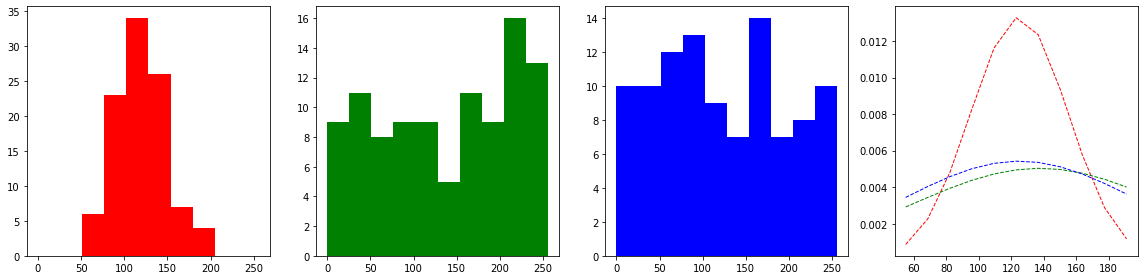

In [145]:
#แสดงผล 
n_bins=10
fig, ((hist_r, hist_g,hist_b, hist_RGB)) = plt.subplots(nrows=1, ncols=4)
fig.set_figwidth(16)
fig.set_figheight(4)
hist_r.hist(r.flatten(),n_bins,[0,256], color = 'r')
hist_g.hist(g.flatten(),n_bins,[0,256], color = 'g')
hist_b.hist(b.flatten(),n_bins,[0,256], color = 'b')

n, bins, ignored = hist_r.hist(r.flatten(), bins=n_bins, density=True)

hist_RGB.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=1, color='r',linestyle='--')

hist_RGB.plot(bins, 1/(g_std_dev * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - g_mean)**2 / (2 * g_std_dev**2) ),
         linewidth=1, color='g',linestyle='--')

hist_RGB.plot(bins, 1/(b_std_dev * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - b_mean)**2 / (2 * b_std_dev**2) ),
         linewidth=1, color='b',linestyle='--')

# plt.imshow(display_all_output)
plt.tight_layout()
plt.show()

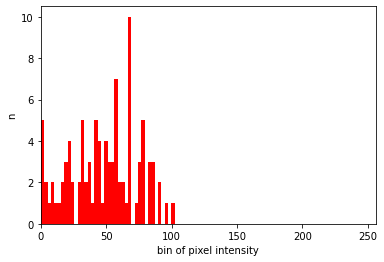

In [121]:
#histogram
num_bins=100

hist,bins = np.histogram(r.flatten(),num_bins,[0,256])
plt.hist(r.flatten(),num_bins,[0,256], color = 'r')

plt.xlim([0,256])
plt.xlabel('bin of pixel intensity')
plt.ylabel('n')
plt.show()

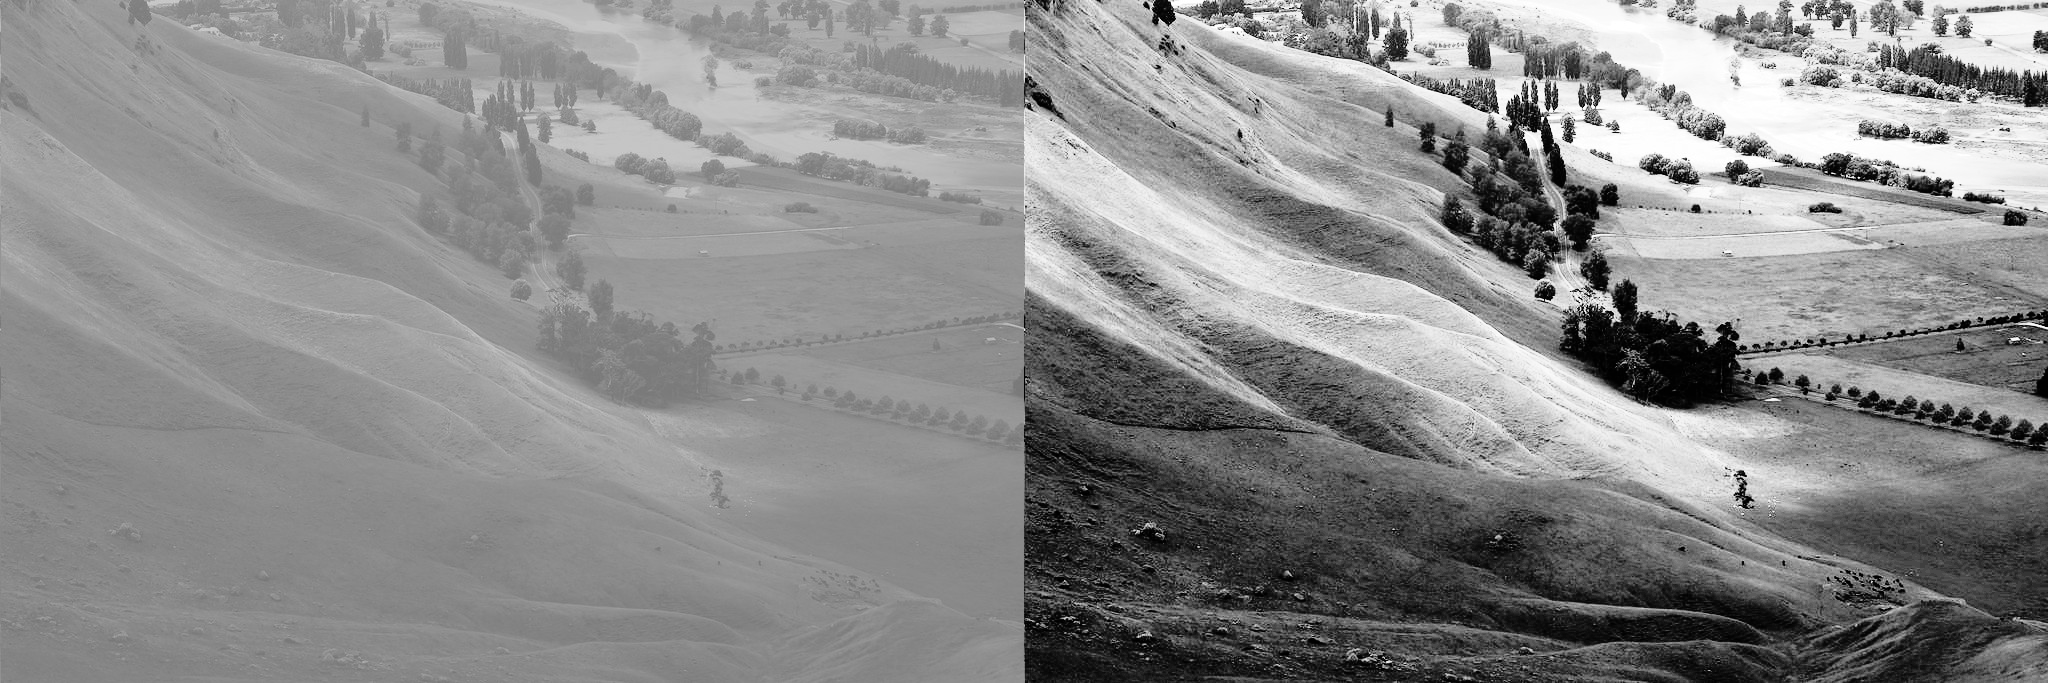

In [132]:
from skimage import io
from google.colab.patches import cv2_imshow
from skimage.util import img_as_ubyte
import cv2

urls="https://github.com/jbinteam/010723305/blob/main/images/Unequalized_Hawkes_Bay_NZ.jpg?raw=true"
image = io.imread(urls)
cv_img = img_as_ubyte(image) #แปลงข้อมูล unsigned byte เป็น image
cv_img = cv2.cvtColor(cv_img,cv2.COLOR_RGB2GRAY)


#ใช้ library opencv ในการทำ　histogram equalization
equ = cv2.equalizeHist(cv_img)
res = np.hstack((cv_img,equ))
cv2_imshow(res)

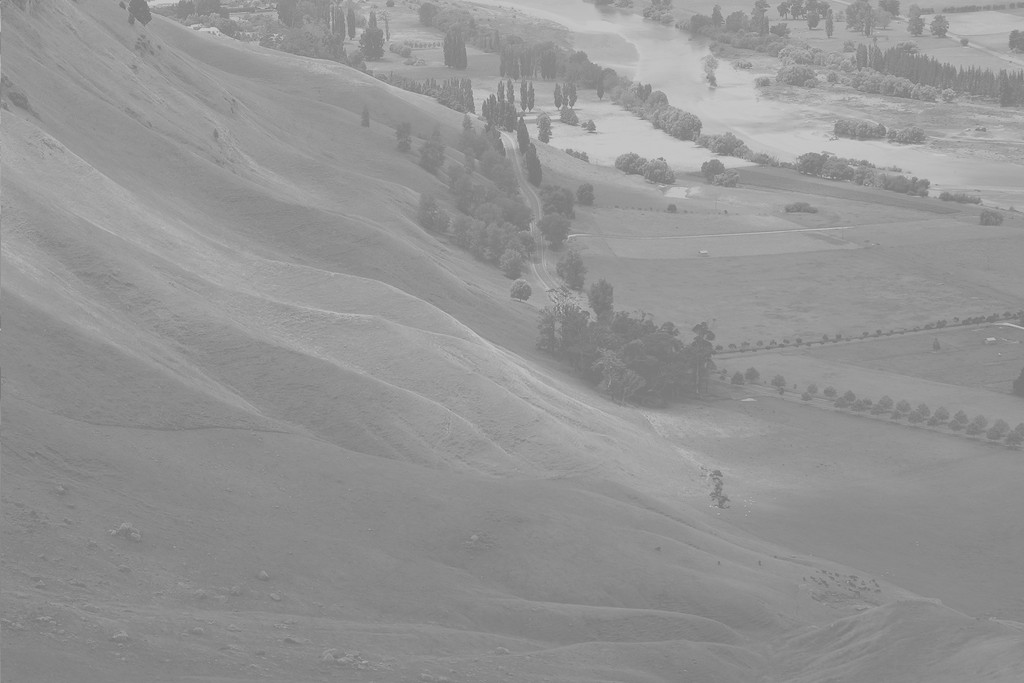

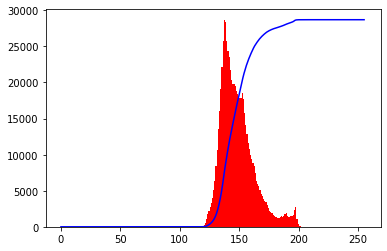

In [133]:
num_bins=256
hist,bins = np.histogram(cv_img.flatten(),num_bins,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(cv_img.flatten(),num_bins,[0,256], color = 'r')
cv2_imshow(cv_img)

(683, 1024)


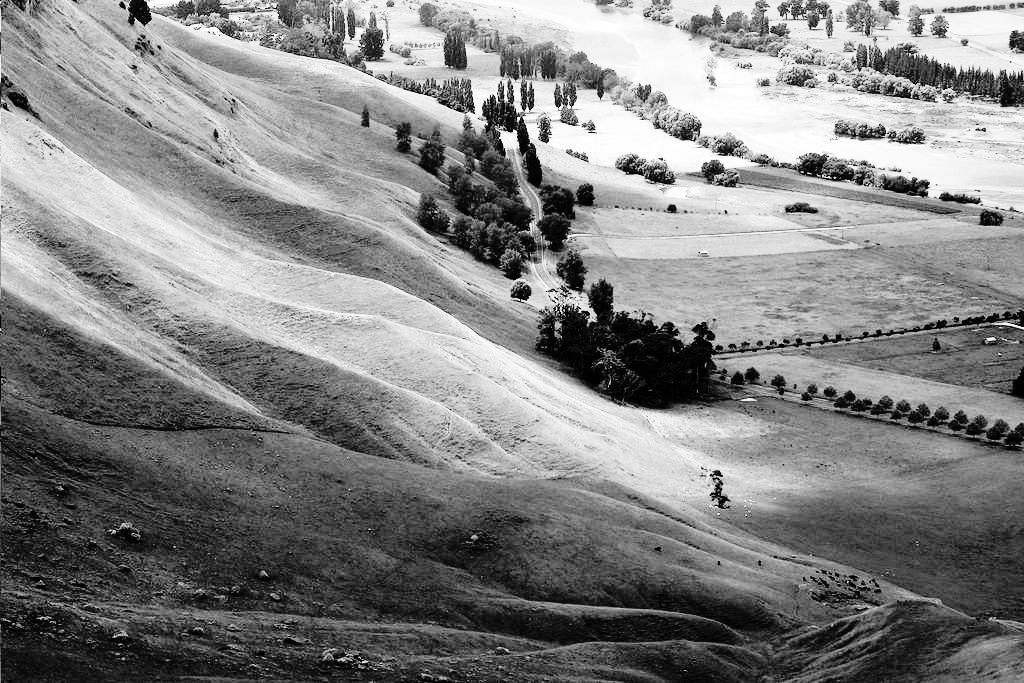

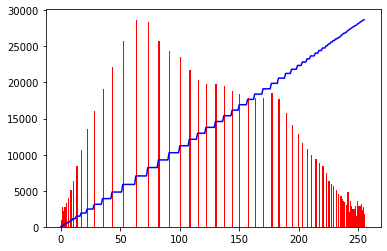

In [134]:
w=cv_img.shape[0]
h=cv_img.shape[1]

cv_flatten=cv_img.flatten()
new_img=np.zeros_like(cv_flatten)
cdf_min=np.min(cdf[np.nonzero(cdf)])

for i in range(cv_flatten.size):
  #จงเติมโค๊ดเพื่อทำการ equalize intensity ของภาพเพื่อให้ได้ผลลัพธ์เช่นเดียวกับการใช้ library ของ　opencv
  new_img[i]=np.round(255*(cdf[cv_flatten[i]]-cdf_min)/(cv_flatten.size-cdf_min))

im=new_img.reshape(w,h)

num_bins=256
new_hist,bins = np.histogram(new_img,num_bins,[0,256])

cdf = new_hist.cumsum()

cdf_normalized = cdf * float(new_hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(new_img,num_bins,[0,256], color = 'r')

cv2_imshow(im)